#### This is a standalone file to allow users to explore the likelihood of models compared to Kepler transit multiplicities across our 3D parameter space.

The only other file needed, logLs_incremental_corrected.txt, is the model results, which can be accessed through Dropbox (you just need to sign in on your account). Caution: it's 112 MB! https://www.dropbox.com/sh/ijtx58sty860aim/AABVScv0AqlTjzWPNPnC4Cd3a?dl=0

In [13]:
import numpy as np
import pandas as pd
from math import lgamma
from ast import literal_eval, parse
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline
#path = 

k = pd.Series([833, 134, 38, 15, 5, 0]) # "ground truth" Kepler transit multiplicity

In [14]:
#https://stackoverflow.com/questions/52232742/how-to-use-ast-literal-eval-in-a-pandas-dataframe-and-handle-exceptions
def literal_eval_w_exceptions(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        #print(e)
        pass
    
def float_w_exceptions(x):
    try:
        return float(x)   
    except Exception as e:
        #print(e)
        pass

In [15]:
# change path here to get logLs_incremental_corrected.txt
df = pd.read_csv('hipergator/logLs_incremental_corrected.txt', sep='\t', error_bad_lines=False, skiprows=1, index_col=False,
                 names=['filename','m','b','c','f','logL','transit_multiplicity','intact_frac',
                            'disrupted_frac','intact_logL','intact_transit_multiplicity','disrupted_logL',
                        'disrupted_transit_multiplicity','young10_logL','young10_transit_multiplicity',
                        'old10_logL','old10_transit_multiplicity','young15_logL','young15_transit_multiplicity',
                        'old15_logL','old15_transit_multiplicity','young20_logL','young20_transit_multiplicity',
                        'old20_logL','old20_transit_multiplicity','young25_logL','young25_transit_multiplicity',
                        'old25_logL','old25_transit_multiplicity','young30_logL','young30_transit_multiplicity',
                        'old30_logL','old30_transit_multiplicity','young35_logL','young35_transit_multiplicity',
                        'old35_logL','old35_transit_multiplicity','young40_logL','young40_transit_multiplicity',
                        'old40_logL','old40_transit_multiplicity','young45_logL','young45_transit_multiplicity',
                        'old45_logL','old45_transit_multiplicity','young50_logL','young50_transit_multiplicity',
                        'old50_logL','old50_transit_multiplicity'], dtype=str)
print(df.head())
#print(df.columns)
print(df.transit_multiplicity[0])
#print(df.logL)

df.transit_multiplicity = df.transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
#df.transit_multiplicity = df.transit_multiplicity.apply(lambda y: np.nan if len(y)==0 else y)
#df.logL = df.logL.apply(str) # convert back from string to list of floats
df.logL = df.logL.apply(float_w_exceptions) # convert back from string to list of floats
df.m = df.m.apply(float_w_exceptions) # convert back from string to list of floats
df.b = df.b.apply(float_w_exceptions) # convert back from string to list of floats
df.c = df.c.apply(float_w_exceptions) # convert back from string to list of floats
df.f = df.f.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac = df.intact_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac = df.disrupted_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_logL = df.intact_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_transit_multiplicity = df.intact_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.disrupted_logL = df.disrupted_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_transit_multiplicity = df.disrupted_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young10_logL = df.young10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young10_transit_multiplicity = df.young10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old10_logL = df.old10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old10_transit_multiplicity = df.old10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young15_logL = df.young15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young15_transit_multiplicity = df.young15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old15_logL = df.old15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old15_transit_multiplicity = df.old15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young20_logL = df.young20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young20_transit_multiplicity = df.young20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old20_logL = df.old20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old20_transit_multiplicity = df.old20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young25_logL = df.young25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young25_transit_multiplicity = df.young25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old25_logL = df.old25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old25_transit_multiplicity = df.old25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young30_logL = df.young30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young30_transit_multiplicity = df.young30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old35_logL = df.old35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old35_transit_multiplicity = df.old35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young40_logL = df.young40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young40_transit_multiplicity = df.young40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old40_logL = df.old40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old40_transit_multiplicity = df.old40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young45_logL = df.young45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young45_transit_multiplicity = df.young45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old45_logL = df.old45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old45_transit_multiplicity = df.old45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young50_logL = df.young50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young50_transit_multiplicity = df.young50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old50_logL = df.old50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old50_transit_multiplicity = df.old50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats


                                            filename     m    b            c  \
0  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
1  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
2  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
3  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
4  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   

     f                logL transit_multiplicity intact_frac disrupted_frac  \
0  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
1  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
2  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
3  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   
4  0.0  -5434.568554576411           [0.0, 0.0]         0.0            0.0   

          intact_logL  ...          old40_logL old

"\n#df.transit_multiplicity = df.transit_multiplicity.apply(literal_eval) # convert back from string to list of floats\n#df.transit_multiplicity = df.transit_multiplicity.apply(lambda y: np.nan if len(y)==0 else y)\n#print(len(df))\n#print(df.m.unique())\n\ndf_groupby_filename = df.groupby(['filename']).mean('logL')\n\n# take mean logL\nmean_df = df.groupby(['filename', 'f']).mean('logL')\n#print(mean_df)\n# groupby-mean doesn't work with lists, so separately take care of that\nlist_df = df.groupby(['filename', 'f']).transit_multiplicity.apply(list)\n#print(list_df)\n# recombine to same DataFrame\nmean_df['transit_multiplicity'] = list_df\nmean_df.reset_index(inplace=True)\n#print(mean_df.head())\n#print(mean_df.f)\n"

In [16]:
df = df.loc[(df.m <= 0.) & (df.m >= -2.) & (df.b >= 0.) & (df.b <= 1.) & (df.logL <= 0.)].dropna(subset=['logL'])

In [17]:
def normalize(curr_row: pd.Series):
    """
    First, remove fraction of planet-hosting systems from each multiplicity. 
    Then, normalize against sample total planet-hosting systems. 
    """
    #print(curr_row)
    first = curr_row['transit_multiplicity']
    first += [0.] * (6 - len(first)) # pad with zeros to match length of k
    second = curr_row['f']
    #print(first)
    #print(second)
    
    try:
        # remove previous normalization
        first = [np.array(fl)/second for fl in first]
    
        # normalize against Kepler data s.t. sum of every transit multiplicity is 1025
        return [np.array(fl)*sum(k)/sum(first) for fl in first]
    
    except Exception as e: # return list of N nans, where N is length of transit multiplicity array    
        print(e)
        try: # eg. divide by zero for f=0; we don't care about those
            return np.nan*np.ones(len(first))
        
        except: # eg. accessed one too many levels
            return np.nan

def normalized_loglike(lam):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of floats)
    - normalized_k: Kepler transit multiplicity divided by sum(k) (list of floats)

    Returns: Poisson log likelihood (float)
    """
    logL = []
    try:
        for i in range(len(lam)):
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
    except:
        #print(lam)
        return np.nan
    
    return np.sum(logL)    

#normalized_k = k/sum(k)
df['normalized_transit_multiplicity'] = df.apply(func=normalize, axis=1)
#df['normalized_logL'] = better_loglike(df['normalized_transit_multiplicity'], normalized_k)
df['normalized_logL'] = df['normalized_transit_multiplicity'].apply(func=normalized_loglike)


/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_28359/2630785855.py:15: RuntimeWarning: invalid value encountered in true_divide
  first = [np.array(fl)/second for fl in first]


### Log likelihood heatmap of discretely sampled models in 3D parameter space.

Parameters are how fast putative "dynamical sculpting" occurs (dP(intact)/dt), the age at which dynamical sculpting ceases (cutoff time), and the initial fraction of dynamically cool systems (initial P(intact)). 

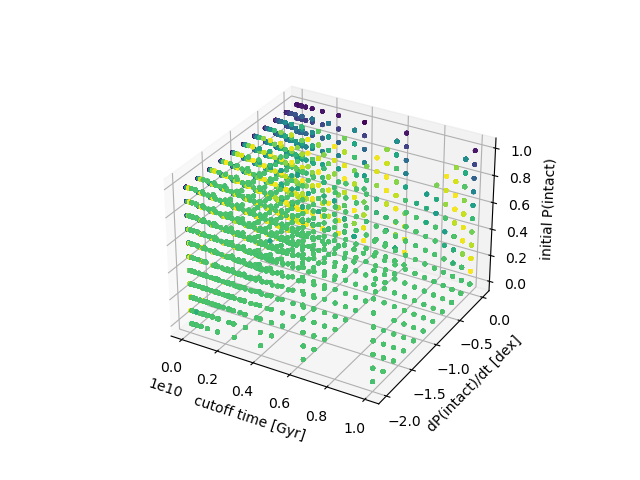

In [21]:
%matplotlib widget

fig = plt.figure()
ax = plt.axes(projection='3d')
im = ax.scatter3D(df.c, df.m, df.b, c=df.normalized_logL, s=5)
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
#fig.colorbar(im, ax=ax)
#fig.tight_layout()
plt.show()

### Same as above, but isolating only best models (logL >= -100)

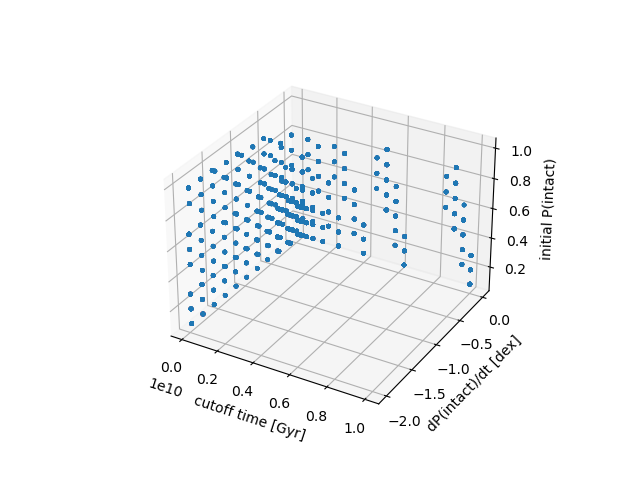

In [18]:
%matplotlib widget

df_keep = df.loc[df.normalized_logL >= -100]
#df_keep = df
fig = plt.figure()
ax = plt.axes(projection='3d')
#im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, c=df_keep.normalized_logL, s=5)
im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, s=5)
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
#fig.colorbar(im, ax=ax)
#fig.tight_layout()
plt.show()